In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [27]:
# 1. 데이터 로드

df = pd.read_csv('/content/drive/MyDrive/Col/머신러닝 9주차/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1, 1)

In [28]:
# 2. 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [29]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data_scaled) - window):
    X.append(data_scaled[i:i+window])
    y.append(data_scaled[i+window])
X, y = np.array(X), np.array(y)

In [30]:
# 4. 훈련 / 테스트 데이터 분리 (8:2 비율, 순서 유지)
# 시계열 데이터이므로 shuffle=False로 설정하여 데이터의 순서를 유지합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"총 샘플 수: {len(X)}")
print(f"훈련 샘플 수: {len(X_train)}")
print(f"테스트 샘플 수: {len(X_test)}")

총 샘플 수: 313
훈련 샘플 수: 250
테스트 샘플 수: 63


In [31]:
# 5. 모델 1: SimpleRNN
print("\n--- SimpleRNN 모델 훈련 시작 ---")
model_rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window, 1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_data=(X_test, y_test))


--- SimpleRNN 모델 훈련 시작 ---
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0253 - val_loss: 0.0271
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - val_loss: 0.0088
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - val_loss: 0.0068
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - val_loss: 0.0060
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - val_loss: 0.0059
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - val_loss: 0.0057
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 0.0052
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - val_loss: 0.0048
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0046
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - val_loss: 0.0043
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - val_loss: 0.0042

In [32]:
# 6. 모델 2: LSTM
print("\n--- LSTM 모델 훈련 시작 ---")
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window, 1)),
    tf.keras.layers.Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_data=(X_test, y_test))


--- LSTM 모델 훈련 시작 ---
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0502 - val_loss: 0.0356
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - val_loss: 0.0145
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - val_loss: 0.0142
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - val_loss: 0.0140
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - val_loss: 0.0140
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - val_loss: 0.0139
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - val_loss: 0.0139
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - val_loss: 0.0139
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - val_loss: 0.0139
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - val_loss: 0.0139
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - val_loss: 0.0139
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

In [33]:
# 7. 예측 및 평가 (MSE)
pred_rnn = model_rnn.predict(X_test)
pred_lstm = model_lstm.predict(X_test)
mse_rnn = mean_squared_error(y_test, pred_rnn)
mse_lstm = mean_squared_error(y_test, pred_lstm)

print("\n--- 모델 평가 (MSE) ---")
print(f"SimpleRNN (Test MSE): {mse_rnn:.6f}")
print(f"LSTM (Test MSE):      {mse_lstm:.6f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 468ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step

--- 모델 평가 (MSE) ---
SimpleRNN (Test MSE): 0.002943
LSTM (Test MSE):      0.009139


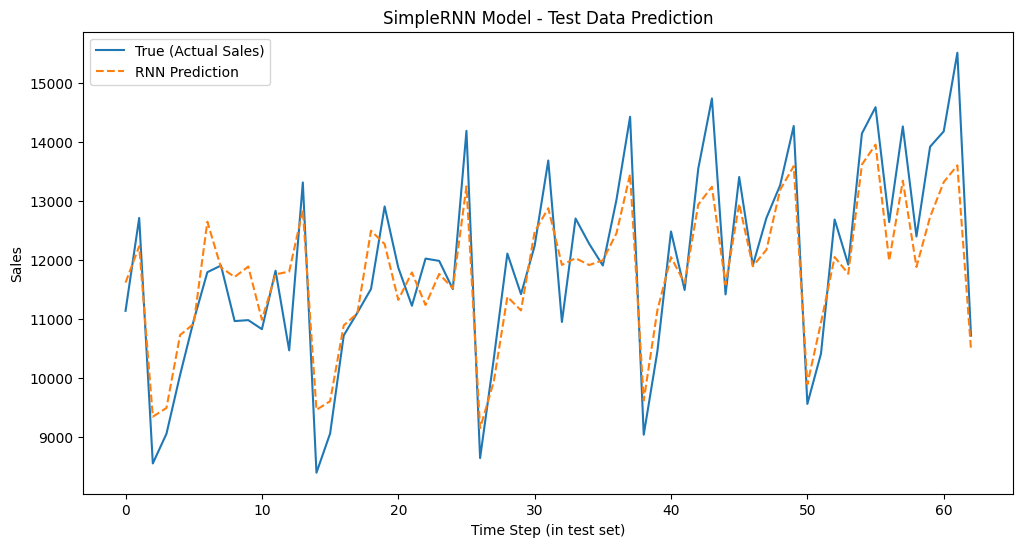

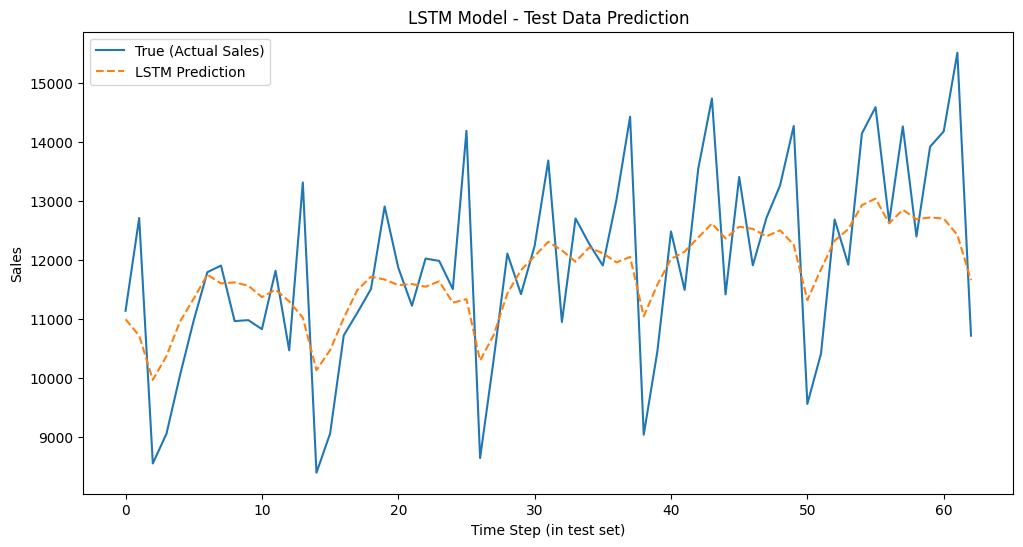

In [34]:
# 8. 그래프화 (원래 스케일로 변환)
# 비교를 위해 원래 값으로 스케일 역변환
y_test_inv = scaler.inverse_transform(y_test)
pred_rnn_inv = scaler.inverse_transform(pred_rnn)
pred_lstm_inv = scaler.inverse_transform(pred_lstm)

# SimpleRNN 그래프
plt.figure(figsize=(12, 6))
plt.title('SimpleRNN Model - Test Data Prediction')
plt.plot(y_test_inv, label='True (Actual Sales)')
plt.plot(pred_rnn_inv, label='RNN Prediction', linestyle='--')
plt.legend()
plt.xlabel('Time Step (in test set)')
plt.ylabel('Sales')
plt.show()

# LSTM 그래프
plt.figure(figsize=(12, 6))
plt.title('LSTM Model - Test Data Prediction')
plt.plot(y_test_inv, label='True (Actual Sales)')
plt.plot(pred_lstm_inv, label='LSTM Prediction', linestyle='--')
plt.legend()
plt.xlabel('Time Step (in test set)')
plt.ylabel('Sales')
plt.show()